In [24]:
# === 1. Import Library ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style seaborn biar lebih enak dilihat
sns.set_theme(style="whitegrid", palette="muted")

In [25]:

# === 2. Load Dataset ===
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:

# === 3. Data Cleaning ===
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:

# === 4. Feature Engineering: Binning Age ===
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels_age = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]

bins_family = [0, 1, 3, 20]
labels_family = ["Single", "Small", "Large"]

df["Age_group"] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=True)
df["Family_Category"] = pd.cut(df['SibSp'] + df['Parch'] + 1, bins=bins_family, labels=labels_family, right=True)

In [28]:

# === 5. Aggregate Survival Data ===

# by Age Group
survived_by_age = df.groupby("Age_group", observed=False).agg(
    survived_count=("Survived", "count"),
    survived_sum=("Survived", "sum")
).reset_index()
survived_by_age["Survival_rate"] = survived_by_age["survived_sum"] / survived_by_age["survived_count"] * 100

# by Sex
survived_by_sex = df.groupby("Sex", observed=False).agg(
    survived_count=("Survived", "count"),
    survived_sum=("Survived", "sum")
).reset_index()
survived_by_sex["Survival_rate"] = survived_by_sex["survived_sum"] / survived_by_sex["survived_count"] * 100

# by Pclass
survived_by_pclass = df.groupby("Pclass", observed=False).agg(
    survived_count=("Survived", "count"),
    survived_sum=("Survived", "sum")
).reset_index()
survived_by_pclass["Survival_rate"] = survived_by_pclass["survived_sum"] / survived_by_pclass["survived_count"] * 100

# by family size
survived_by_familysize = df.groupby("Family_Category", observed=False).agg(
    survived_count=("Survived", "count"),
    survived_sum=("Survived", "sum")
).reset_index()
survived_by_familysize["Survival_rate"] = (
    survived_by_familysize["survived_sum"] / survived_by_familysize["survived_count"] * 100
)

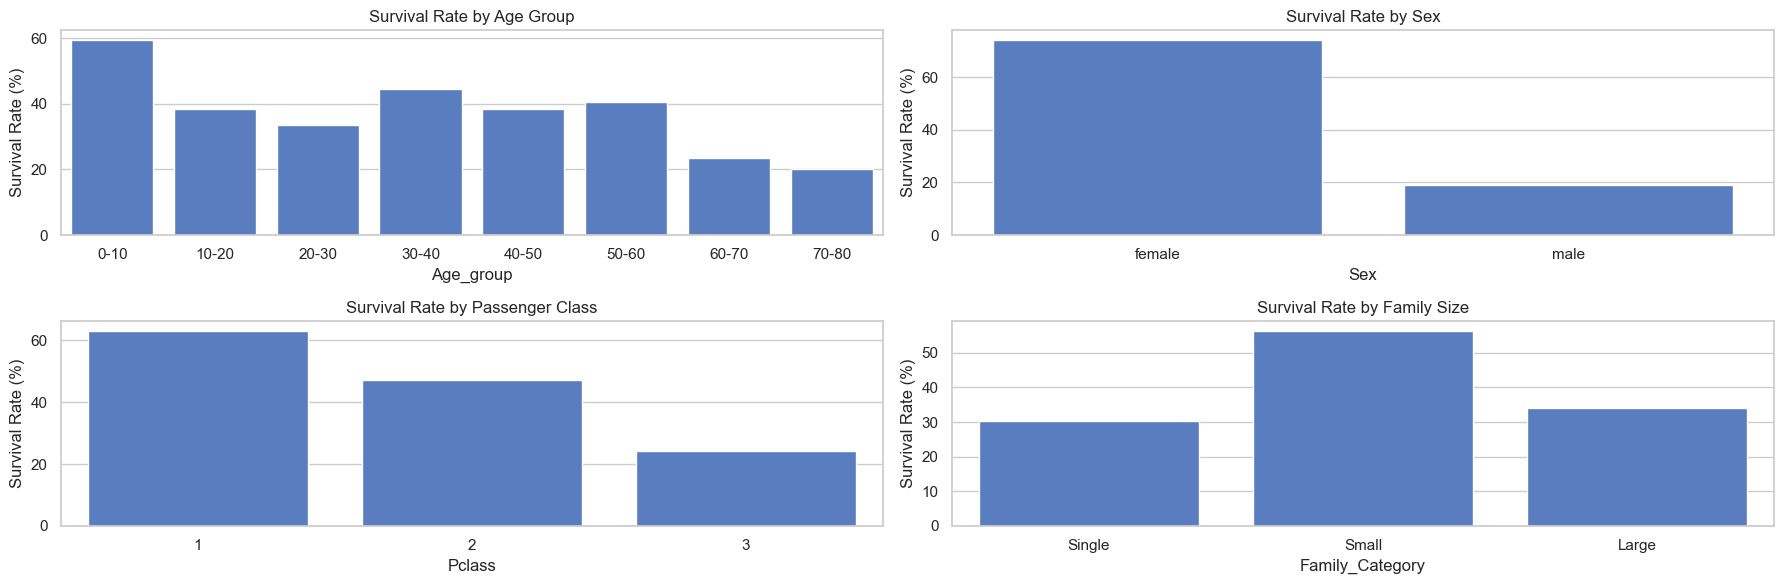

In [29]:

# === 6. Visualization ===

fig, axes = plt.subplots(2, 2, figsize=(18, 6))

# Survival by Age Group
sns.barplot(data=survived_by_age, x="Age_group", y="Survival_rate", ax=axes[0, 0])
axes[0, 0].set_title("Survival Rate by Age Group")
axes[0, 0].set_ylabel("Survival Rate (%)")

# Survival by Sex
sns.barplot(data=survived_by_sex, x="Sex", y="Survival_rate", ax=axes[0, 1])
axes[0, 1].set_title("Survival Rate by Sex")
axes[0, 1].set_ylabel("Survival Rate (%)")

# Survival by Pclass
sns.barplot(data=survived_by_pclass, x="Pclass", y="Survival_rate", ax=axes[1, 0])
axes[1, 0].set_title("Survival Rate by Passenger Class")
axes[1, 0].set_ylabel("Survival Rate (%)")

sns.barplot(data=survived_by_familysize, x="Family_Category", y="Survival_rate", ax=axes[1, 1])
axes[1, 1].set_title("Survival Rate by Family Size")
axes[1, 1].set_ylabel("Survival Rate (%)")

plt.tight_layout()
plt.show()